In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
root_path = './'
methods = ['local_pet_4','local_pet_5']
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

sampled_data = 40
clients_in_total = 10
clients = 10
iter = 100

log_paths = []
csv_paths = []
for method in methods:
    log_paths.append(os.path.join(root_path, 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
    csv_paths.append(os.path.join(root_path, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))



In [3]:
for i in range(len(methods)):
    method = methods[i]
    log_path = log_paths[i]
    phrase = 'modeling - /data/cdq/pet/' + 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
    with open(log_path) as f:
        f = f.readlines()
    df = pd.DataFrame(data=None,index = range(iter), columns = range(clients))

    for line in f:
        if phrase in line:
           
            gen = int(re.findall(r'/g(.+?)/',line)[0])
            client = int(re.findall(r'client(.+?)',line)[0])

            score_line = f[f.index(line)+2]
            acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
            df[client][gen]=acc
    df.to_csv(csv_paths[i])

    print(log_path)
    print(df)


./log_local_pet_4_40_10.log
           0         1         2         3         4         5         6  \
0   0.252368    0.5175  0.279342    0.3325  0.261316  0.382632  0.408947   
1       0.25  0.367632  0.250658  0.265789  0.254605  0.295263  0.260526   
2       0.25    0.3625  0.250658  0.264868  0.253684  0.289605  0.257895   
3       0.25  0.358553  0.250658  0.263684  0.253553  0.284868  0.256974   
4       0.25  0.356447  0.250658  0.262237  0.253289  0.281316  0.255921   
..       ...       ...       ...       ...       ...       ...       ...   
95       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
96       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
97       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
98       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9  
0   0.271184  0.258816  

local_pet_4
[0 0 0 0 0 0 0 0 0 0] [0.25236842 0.5175     0.27934211 0.3325     0.26131579 0.38263158
 0.40894737 0.27118421 0.25881579 0.30657895]
[1 1 1 1 1 1 1 1 1 1] [0.25       0.36763158 0.25065789 0.26578947 0.25460526 0.29526316
 0.26052632 0.25947368 0.25421053 0.25276316]
[2 2 2 2 2 2 2 2 2 2] [0.25       0.3625     0.25065789 0.26486842 0.25368421 0.28960526
 0.25789474 0.25618421 0.25263158 0.25184211]
[3 3 3 3 3 3 3 3 3 3] [0.25       0.35855263 0.25065789 0.26368421 0.25355263 0.28486842
 0.25697368 0.25447368 0.25223684 0.25171053]
[4 4 4 4 4 4 4 4 4 4] [0.25       0.35644737 0.25065789 0.26223684 0.25328947 0.28131579
 0.25592105 0.25407895 0.25210526 0.25171053]
[5 5 5 5 5 5 5 5 5 5] [0.25       0.35302632 0.25065789 0.26105263 0.25302632 0.27973684
 0.25526316 0.25394737 0.25171053 0.25157895]
[6 6 6 6 6 6 6 6 6 6] [0.25       0.35105263 0.25065789 0.26105263 0.25276316 0.27868421
 0.25513158 0.25368421 0.25157895 0.25144737]
[7 7 7 7 7 7 7 7 7 7] [0.25       0.3493421

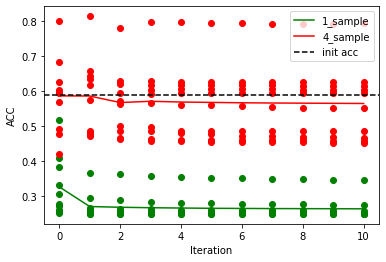

In [4]:
violin_data = []
fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('ACC')
# plt.title("n sample(s) per client. \nMethod: local_pet; Clients in total: 10")
methods_shown = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'fedpet_voting_avg_3','local_pet_2']
labels = ['1_sample', '4_sample']
label_idx = 0
# ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting', 'fedpet_voting_avg', 'local_pet', 'fedpet_voting_avg_2', 'local_pet_2', 'fedpet_voting_avg_3']

for i in range(len(methods)):
    print(methods[i])
    # if methods[i] in methods_shown:
    #     pass
    # else:
    #     continue
    csv_path = csv_paths[i]
    df = pd.read_csv(csv_path,index_col=0)
    y_mean = []
    for j in range(iter):
        if j > 10:
            break
        x = np.array([j]*clients)
        y = np.array(df.iloc[j])
        if j == 0:
            violin_data.append(y)
        print(x,y)
        y_mean.append(pd.DataFrame(y).dropna().mean())
        plt.scatter(x, y,color=colors[i]) 
    # plt.plot(range(iter),y_mean,color=colors[i],label=methods[i])
    plt.plot(range(11),y_mean,color=colors[i],label=labels[label_idx])
    label_idx = label_idx + 1

plt.axhline(0.59, color='k',ls='--',label='init acc')

plt.legend()

plt.savefig('local-fsl-performance.pdf')
plt.show()

In [5]:
violin_data

[array([0.25236842, 0.5175    , 0.27934211, 0.3325    , 0.26131579,
        0.38263158, 0.40894737, 0.27118421, 0.25881579, 0.30657895]),
 array([0.6       , 0.80118421, 0.60381579, 0.62486842, 0.42039474,
        0.59578947, 0.47763158, 0.56815789, 0.49131579, 0.6825    ])]

In [6]:
root_path = './'
methods = ['local_pet_3']
colors = ['r', 'b', 'y', 'purple','k', 'olive','cyan']

sampled_data = 40
clients_in_total = 10
clients = 10
iter = 100

log_paths = []
csv_paths = []
for method in methods:
    log_paths.append(os.path.join(root_path, 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
    csv_paths.append(os.path.join(root_path, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))

In [7]:
for i in range(len(methods)):
    method = methods[i]
    log_path = log_paths[i]
    phrase = 'modeling - /data/cdq/pet/' + 'log_' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
    with open(log_path) as f:
        f = f.readlines()
    clients = 100
    df = pd.DataFrame(data=None,index = range(iter), columns = range(clients))

    for line in f:
        if phrase in line:
           
            gen = int(re.findall(r'/g(.+?)/',line)[0])
            client = int(re.findall(r'client(\d+)',line)[0])
            # print(re.findall(r'client(\d+)',line))

            score_line = f[f.index(line)+2]
            acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
            df[client][gen]=acc
    df.to_csv(csv_paths[i])

    print(log_path)
    print(df)


./log_local_pet_3_40_10.log
          0         1         2         3         4         5         6   \
0   0.253947  0.374737  0.372632  0.408947  0.260132  0.408553  0.306579   
1   0.250921  0.313553  0.281579  0.260526  0.253158  0.371316  0.252763   
2   0.250526  0.302763  0.277763  0.257895  0.252632  0.367237  0.251842   
3   0.250395  0.297105  0.274211  0.256974    0.2525  0.364605  0.251711   
4   0.250395  0.293158  0.272632  0.255921  0.252105  0.363553  0.251711   
..       ...       ...       ...       ...       ...       ...       ...   
95       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
96       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
97       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
98       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9   ...        90        91  

local_pet_3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0.25394737 0.37473684 0.37263158 0.40894737 0.26013158 0.40855263
 0.30657895 0.34026316 0.25210526 0.33039474 0.25039474 0.27486842
 0.33578947 0.39973684 0.26171053 0.32052632 0.25039474 0.27526316
 0.30460526 0.25078947 0.25       0.29       0.25039474 0.2925
 0.28513158 0.28973684 0.26684211 0.26631579 0.25328947 0.28776316
 0.3325     0.54368421 0.25868421 0.26618421 0.33210526 0.32565789
 0.43539474 0.26078947 0.29907895 0.47328947 0.26565789 0.38328947
 0.35736842 0.25605263 0.29934211 0.31342105 0.47921053 0.31842105
 0.25236842 0.28973684 0.36052632 0.35671053 0.27934211 0.25578947
 0.29276316 0.31763158 0.37684211 0.27078947 0.26881579 0.58605263
 0.37052632 0.26131579 0.38263158 0.25236842 0.45157895 0.31526316
 0.28144737 0.26236842 0.35578947 0.27026316 0.2588

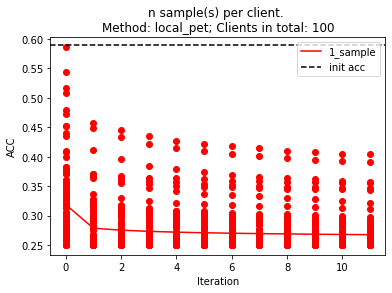

In [8]:
fig = plt.figure()
plt.xlabel('Iteration')
plt.ylabel('ACC')
plt.title("n sample(s) per client. \nMethod: local_pet; Clients in total: 100")
methods_shown = ['fedcls_vanilla', 'fedpet_avg', 'local_pet', 'fedpet_voting_avg_3','local_pet_2']
labels = ['1_sample', '4_sample']
label_idx = 0
# ['fedcls_vanilla', 'fedpet_avg', 'fedpet_voting', 'fedpet_voting_avg', 'local_pet', 'fedpet_voting_avg_2', 'local_pet_2', 'fedpet_voting_avg_3']

for i in range(len(methods)):
    print(methods[i])
    # if methods[i] in methods_shown:
    #     pass
    # else:
    #     continue
    csv_path = csv_paths[i]
    df = pd.read_csv(csv_path,index_col=0)
    y_mean = []
    for j in range(iter):
        # if j > 20:
        #     break
        x = np.array([j]*clients)
        y = np.array(df.iloc[j])
        if j == 0:
            violin_data.append(y)
        print(x,y)
        y_mean.append(pd.DataFrame(y).dropna().mean())
        plt.scatter(x, y,color=colors[i]) 
    # plt.plot(range(iter),y_mean,color=colors[i],label=methods[i])
    plt.plot(range(iter),y_mean,color=colors[i],label=labels[label_idx])
    label_idx = label_idx + 1

plt.axhline(0.59, color='k',ls='--',label='init acc')

plt.legend()

plt.savefig('exp4.png')
plt.show()

In [9]:
violin_data_processed = violin_data[1:]

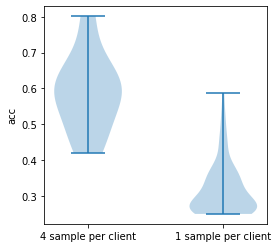

In [10]:
fig, ax1= plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharey=True)

# ax1.set_title('Different samples per client performance \nafter 1 iteration training. Init acc is 0.59')
ax1.set_xlabel('')
ax1.set_ylabel('acc')
ax1.violinplot(violin_data_processed)
plt.xticks([1,2],['4 sample per client','1 sample per client'])

plt.savefig('local-fsl-distribution.pdf')
plt.show()